# Implementation of clustering algorithms
"""ADEM BARAN ORHAN"""

Builded K-Means and Agglomerative Clustering models to perform an unsupervised clustering by using given data. 

Data cleaning done like handling missing values, encoding categorical features, extracting useful features by using existing features, handling outliers

Data Preprocessing
scaling the features, performing dimensionality reduction

Clustering
Used K-Means and Agglomerative Clustering Algorithms. Appled Elbow Method to determine the number of clusters.

Silhouette Scores
Silhouette Scores for all of data points.


In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
#Dropping the first column because we already have the indexes and dropping the Z columns becasue they have no info and no interest in the data
df = df.drop(df.columns[[0]], axis=1)
df = df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


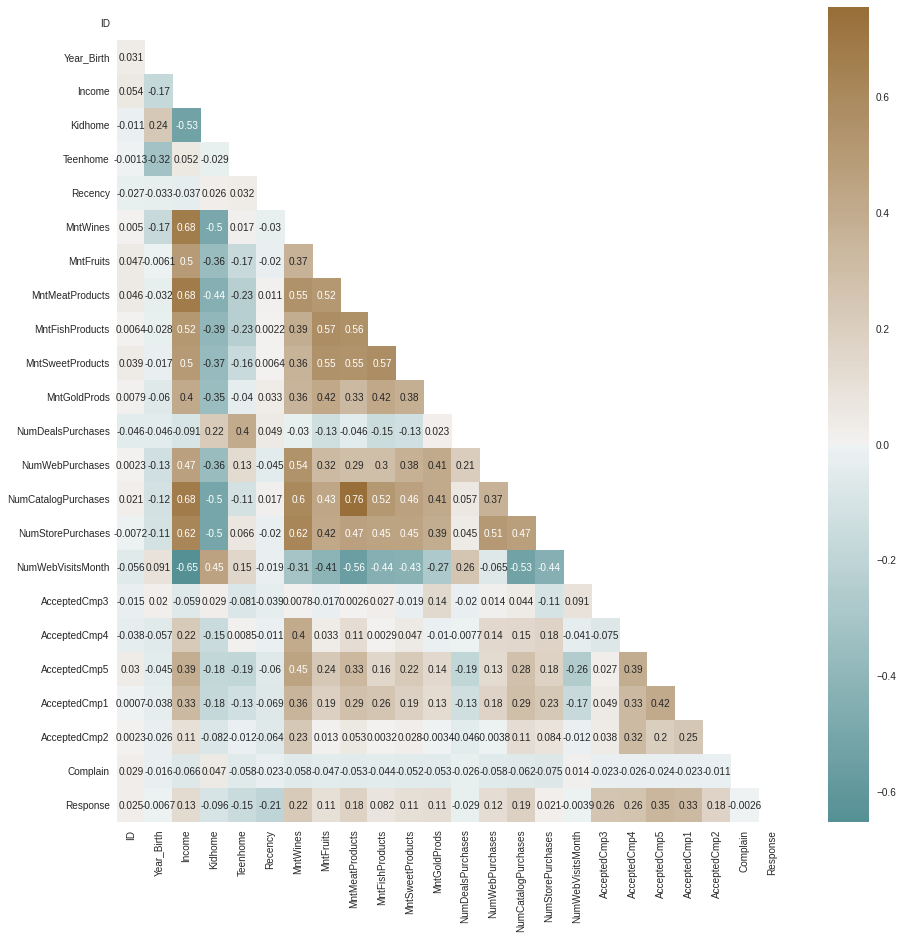

In [ ]:
#Correlation 
corr=df.corr()

mask = np.zeros_like(corr, dtype=np.bool)# Generate a mask for the upper triangle
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(200, 50, as_cmap=True)# Generate a custom diverging colormap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap=cmap ,mask=mask,center=0)
plt.show()


# Data Cleaning

In [ ]:
#Our purpose is our data is correct, consistent and usable.

In [ ]:
df.shape #1001 row and 27 column

(1001, 27)

In [ ]:
df.isna().any()
#WE CAN SEE THAT THERE ARE NA VALUES

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [ ]:
df.info()
#Info about the data and also see that Income some of the values are missing.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1001 non-null   int64  
 1   Year_Birth           1001 non-null   int64  
 2   Education            1001 non-null   object 
 3   Marital_Status       1001 non-null   object 
 4   Income               988 non-null    float64
 5   Kidhome              1001 non-null   int64  
 6   Teenhome             1001 non-null   int64  
 7   Dt_Customer          1001 non-null   object 
 8   Recency              1001 non-null   int64  
 9   MntWines             1001 non-null   int64  
 10  MntFruits            1001 non-null   int64  
 11  MntMeatProducts      1001 non-null   int64  
 12  MntFishProducts      1001 non-null   int64  
 13  MntSweetProducts     1001 non-null   int64  
 14  MntGoldProds         1001 non-null   int64  
 15  NumDealsPurchases    1001 non-null   i

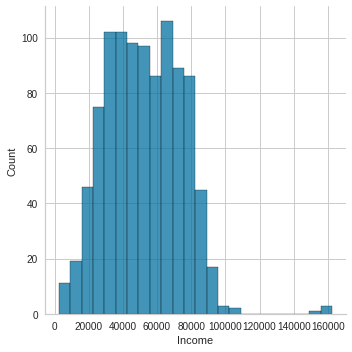

In [ ]:
sns.displot(df['Income'])

In [ ]:
#Filling the missing values in Income with mean
df['Income'] = df['Income'].fillna(df['Income'].mean())#Above we are seeing not skewed data so we are using mean isntead of median
df.isna().any() 

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [ ]:
#Since unique values are important for us because we can see them and replace them with the less category
# Exploring the unique categories  "Marital_Status"
print("Martial Status",df['Marital_Status'].value_counts())  
print("")
print("Education",df["Education"].value_counts())

Martial Status Married     373
Together    255
Single      222
Divorced    111
Widow        37
Alone         3
Name: Marital_Status, dtype: int64

Education Graduation    504
PhD           226
Master        163
2n Cycle       90
Basic          18
Name: Education, dtype: int64


In [ ]:
#Replacing the Martial Status values with less category and we have more clean data
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Partners')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone'],'Single')

In [ ]:
#Replacing the Education values with less category and we have more clean data
df['Education'] = df['Education'].replace(['2n Cycle','PhD','Graduation', 'Master'],'Post_Graduate')  
df['Education'] = df['Education'].replace(['Basic'], 'Under_Graduate')

In [ ]:
#To decrease the dimension of the data we can combine the columns with relative groups 
#Like MntWines: Amount spent on wine in last 2 years MntFruits: Amount spent on fruits in last 2 years,MntMeatProducts: Amount spent on meat in last 2 years,MntFishProducts: Amount spent on fish in last 2 years,MntSweetProducts: Amount spent on sweets in last 2 years,MntGoldProds: Amount spent on gold in last 2 years
df["Spent_amount"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#new column with combined kids and teens
df["Young_People"]=df["Kidhome"]+df["Teenhome"]

#new column combined of the total num group datas
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

#New column which combine of the campaigns
df['Total_Cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [ ]:
#Since we combined the columns above we dont need them so dropping thme below
col_del = ["NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response",  "Kidhome", "Teenhome",]
df=df.drop(columns=col_del,axis=1)


In [ ]:
#For Date birth like 1965 it will be better to replace the column with the age like 65,15 
#Current year selected 2022
df["Age"] = 2022-df["Year_Birth"]

In [ ]:
# Dt_Customer: Date of customer's enrollment with the company
# It is format like dd-mm-yyyy and changing the format of it relative to first day on data
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['first_cust'] = '01-01-2015'
df['first_cust'] = pd.to_datetime(df.first_cust)
df['Enrol_Date'] = (df['first_cust'] - df['Dt_Customer']).dt.days

In [ ]:
df=df.drop(columns=['ID', "Dt_Customer", "first_cust", "Year_Birth", "Dt_Customer", "Recency", "Complain"],axis=1)

In [ ]:
#We now obtained more clean and less complex data
print(df.shape)
df.head()

(1001, 9)


,Education,Marital_Status,Income,Spent_amount,Young_People,NumTotalPurchases,Total_Cmp,Age,Enrol_Date
0,Post_Graduate,Single,58138.0,1617,0,25,1,65,997
1,Post_Graduate,Single,46344.0,27,2,6,0,68,151
2,Post_Graduate,Partners,71613.0,776,0,21,0,57,498
3,Post_Graduate,Partners,26646.0,53,1,8,0,38,91
4,Post_Graduate,Partners,58293.0,422,1,19,0,41,347


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e6c854910>]],
      dtype=object)

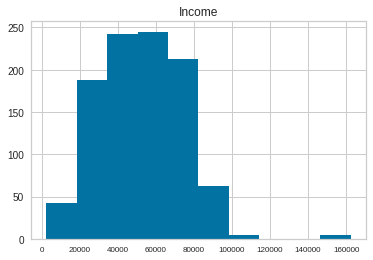

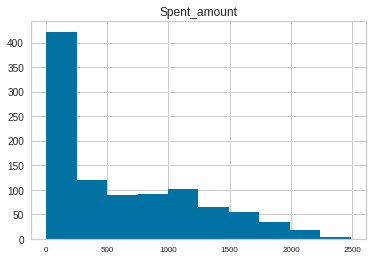

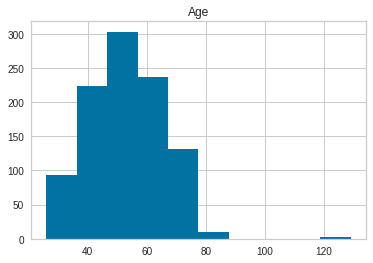

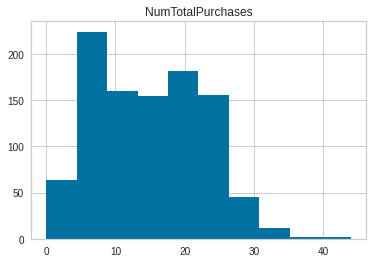

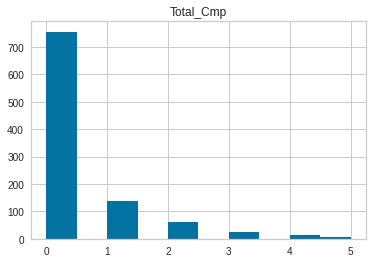

In [ ]:
#We have not too much graphs to show because we have not too many columns so we can see the distribution of the data and the outliers.
df.hist(column="Income",xlabelsize=8)#We can see that there is outliers in the Income column 
df.hist(column="Spent_amount",xlabelsize=8)
df.hist(column='Age')#We can see that there is outliers in the Age column 
df.hist(column='NumTotalPurchases')
df.hist(column='Total_Cmp')

In [ ]:
#We saw the outliers in the age and income column and we need to deal with them
df = df[(df["Age"]<100)]
df = df[(df["Income"]<130000)]

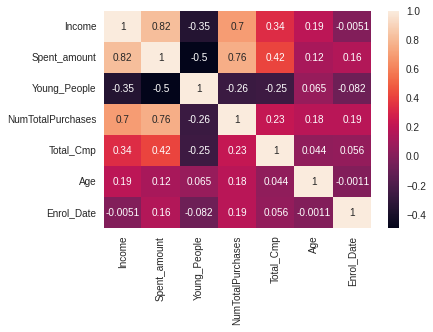

In [ ]:
#correlation matrix on new dataframe we cleaned
sns.heatmap(df.corr(), annot=True)

#Data Preprocessing

In [ ]:
#In this step we are transforming raw data into an understandable format for machine learning algorithms. 
#In this step scaling the features,encoding , performing dimensionality reduction 

In [ ]:
#Converting categorical to numerical values
le = LabelEncoder()

encoded_education = le.fit_transform(df['Education'])
df['Education'] = encoded_education

encoded_marital = le.fit_transform(df['Marital_Status'])
df['Marital_Status'] = encoded_marital
df_copy = df.copy()

In [ ]:
df.head()

,Education,Marital_Status,Income,Spent_amount,Young_People,NumTotalPurchases,Total_Cmp,Age,Enrol_Date
0,0,1,58138.0,1617,0,25,1,65,997
1,0,1,46344.0,27,2,6,0,68,151
2,0,0,71613.0,776,0,21,0,57,498
3,0,0,26646.0,53,1,8,0,38,91
4,0,0,58293.0,422,1,19,0,41,347


In [ ]:
#Scaling the data for agglomerative clustering
scaler = StandardScaler()
scaler.fit(df_copy)
scaled_df = pd.DataFrame(scaler.transform(df_copy),columns= df_copy.columns )
#We will use the scaled dataframe for our 2 models.

In [ ]:
scaled_df.head()

,Education,Marital_Status,Income,Spent_amount,Young_People,NumTotalPurchases,Total_Cmp,Age,Enrol_Date
0,-0.135804,1.298648,0.293254,1.676771,-1.213089,1.332926,0.645895,1.016495,2.047412
1,-0.135804,1.298648,-0.276435,-0.980721,1.368947,-1.177159,-0.472606,1.270853,-1.693322
2,-0.135804,-0.770032,0.944141,0.271142,-1.213089,0.804487,-0.472606,0.338206,-0.159002
3,-0.135804,-0.770032,-1.227913,-0.937265,0.077929,-0.912939,-0.472606,-1.272730,-1.958622
4,-0.135804,-0.770032,0.300741,-0.320526,0.077929,0.540268,-0.472606,-1.018372,-0.826675


In [ ]:
#Performing dimensionality reduction
#Because before the eveluating models we need to use it 
#Most of the columns are correlated 
#we are reducing dimensionality with the PCA which principal component analysis


In [ ]:
#We have 9 columns and we can reduce them by 3 so n_components is seelcted as 3
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_1 = pd.DataFrame(pca.transform(scaled_df), columns=(["feature1","feature2", "feature3"]))
PCA_1.describe().T

,count,mean,std,min,25%,50%,75%,max
feature1,994.0,6.344132e-17,1.747048,-3.309608,-1.596731,-0.186730,1.440975,4.550335
feature2,994.0,9.104331e-17,1.107985,-2.428619,-0.671442,-0.061274,0.500241,6.279196
feature3,994.0,-4.970314e-18,1.024769,-2.360339,-0.788828,-0.069506,0.694091,3.287074


# Agglomerative Clustering

In [ ]:
################ Agglomerative ############

In [ ]:
#For the agglomerative clustering model we can say that Recursively merges pair of clusters of sample data; uses linkage distance

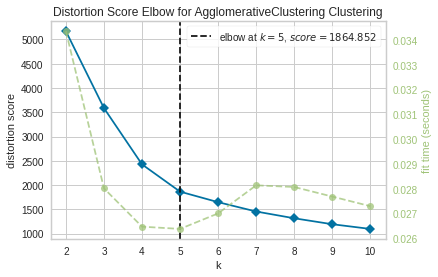

In [ ]:
#We are using Elbow Method to determine the number of clusters
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=10)
Elbow_M.fit(PCA_1)
Elbow_M.show()

In [ ]:
#We get the k=5 for optimal k for number of clusters as score of 1638

In [ ]:
#Agglomerative Model
Agg_model = AgglomerativeClustering(n_clusters=5) #we are selecting 5 and initiate the model as AC

predicted_Agg = Agg_model.fit_predict(PCA_1)# fitting and predicting clusters
PCA_1["Aggl_Cluster"] = predicted_Agg

#Adding the Clusters feature to the orignal dataframe.
df["Aggl_Cluster"]= predicted_Agg #our predicted agg values are added as clusters to our first dataframe df

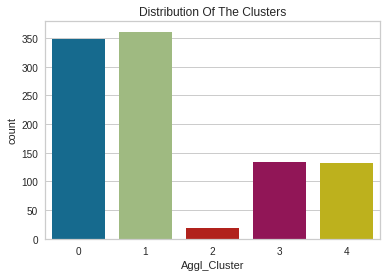

In [ ]:
#Distribution Of The Clusters
viz = sns.countplot(x=df["Aggl_Cluster"])
viz.set_title("Distribution Of The Clusters") 
plt.show() #We are vizualizing the patterns of clusters

#Distrubition of clusters are little bit skewed at agglomerative clustering. We are wanting more fair distrubuted data normally.

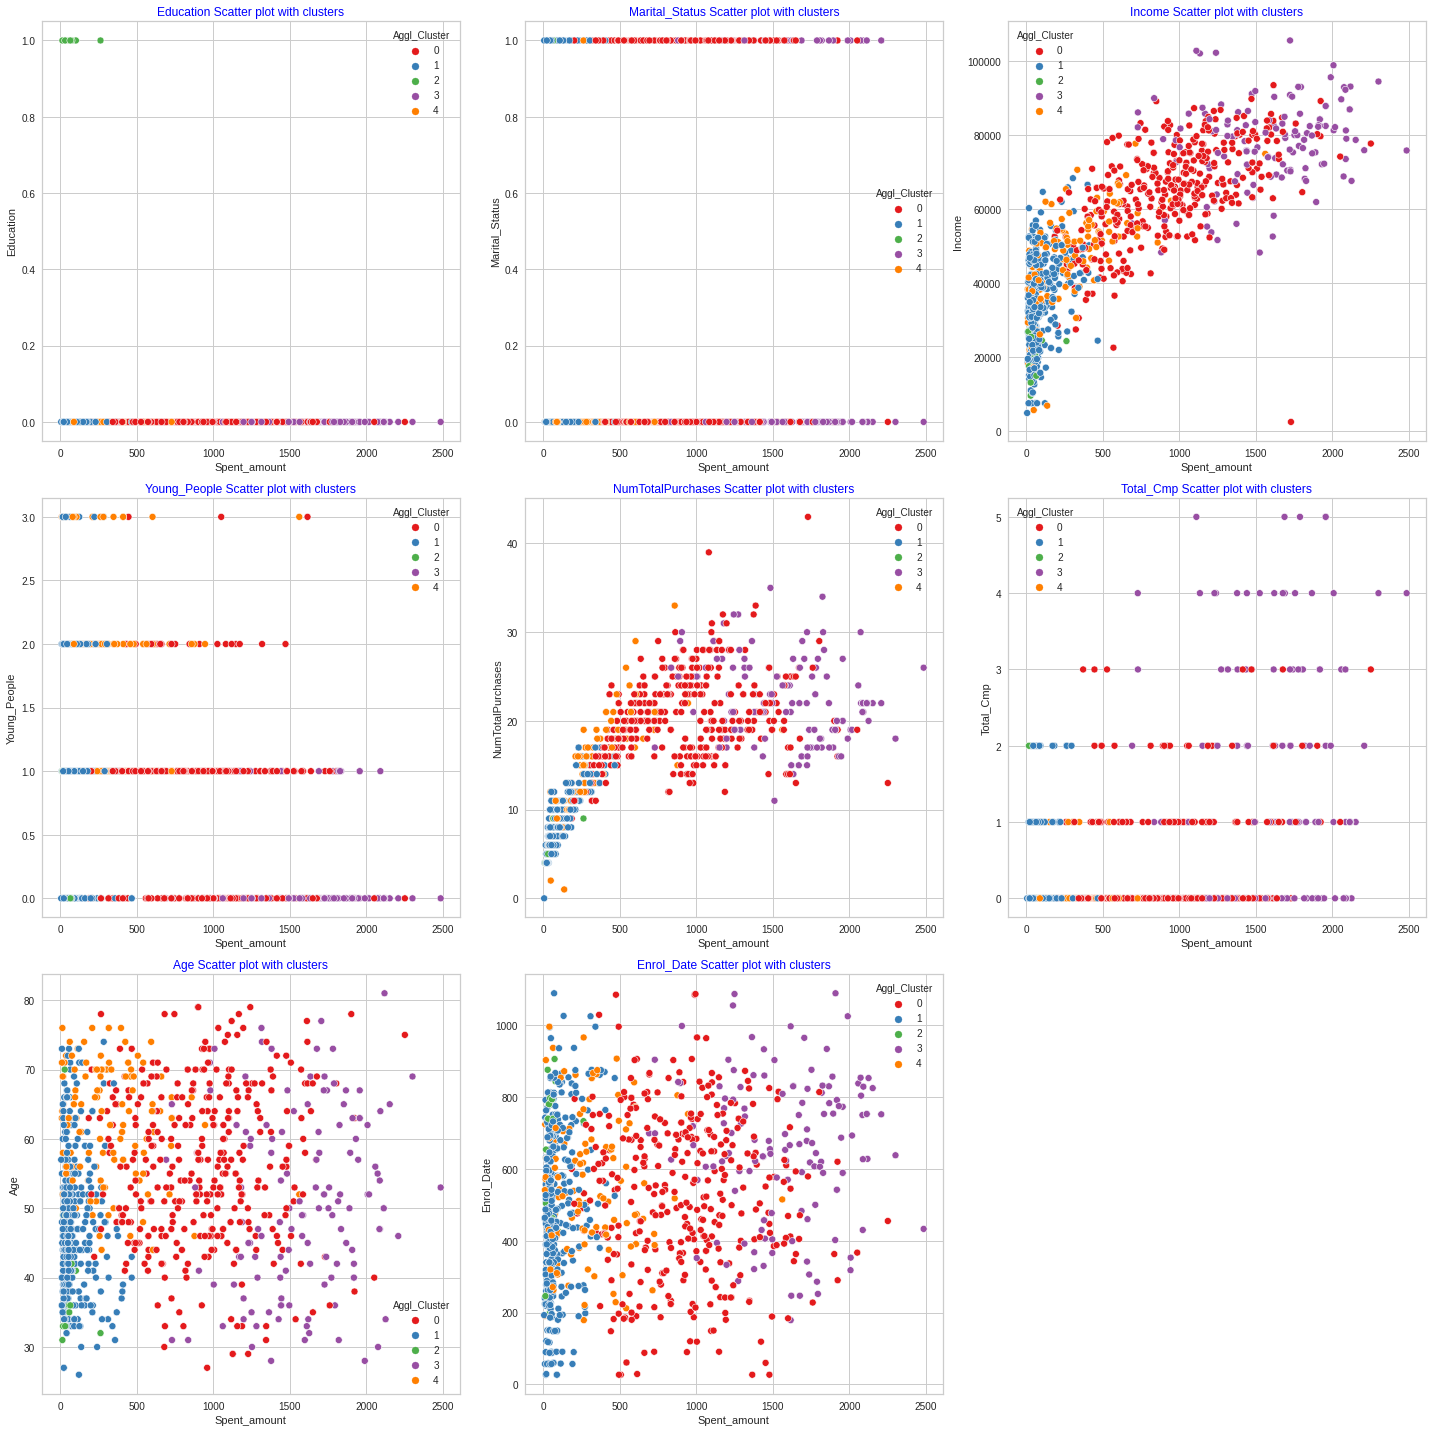

In [ ]:
f=plt.figure(figsize=(20,20))
scatter_cols =['Education','Marital_Status','Income','Young_People','NumTotalPurchases','Total_Cmp','Age','Enrol_Date']
for i, col in enumerate(scatter_cols):
    ax=f.add_subplot(3,3,i+1)
    sns.scatterplot(x=df['Spent_amount'],y=df[col],hue=df['Aggl_Cluster'],palette= 'Set1')
    ax.set_title(col+" Scatter plot with clusters",color='blue')
    plt.ylabel(col)
f.tight_layout()




In [ ]:
#Education and Spent_amount scatter graph:
#1 is undergraduate and 0 is postgraduates
#Group 0 who are undergraduates are spending amount isi too low compared to graduates who are 0.0 at Education graph
#Group 2 is spending too high, group 3 is spending too low compared to other postgraduated.Group 1 is spending low at postgraduates.Group 4 is spending more than 1 and lower than 2
######
#Marital Status and Spent_amount plot:
#(Single is 1 Partners is 0)
#Group 0 spending average  when group 1 spending too low most of the group1 is partners. Group 2 is spending too high compared to others.
#Group 3 who are in the singles like divorced etc. spending too low.Group 1 is spending too low when most of the them are partners like married.Group 4 is spending averages.
######
#Income and Spent amount:
#Group 0 is at the average income and average spending.Group 1 is low spending,low-average income.
#Group 2 is high income and high spending.Group 3 is at low spend amount and  considered average income.
#Group 4 low spending amount and low income.
######
#Young people and spend amount
#Young includes kids and teens at homes
#Group 0 is with average spent amount and includes every young peoples.Group 1 is at low spent amount.
#Group 2 is at high spending amount at always.Group 3 is at too low spending amount with ecery feateures of young peoples.Group  4 is at very low and only at 00 which no youngs at home.
#####
#Num total purchases and spent amount
#Group 0 is at middle of graph at averages.G1 is at low spending and low total purchases.
#G2 is at high spending and average total purchases.G3  is too low spending and too low total purchases.
#G4 is also too low spending and total purchases.


In [ ]:
#Total_cmp and Spent amount:
#Group 0 is average spend and not too much total campaign.G1 low spending low total campaign
#G2 is high spending and high acceptted total campaign. G3 and G4 at low spending at low and average acceptted total campaign
#####
#Age and spent_amount 
#Group 0 is average spending and distributed age.G1 is low spending and all ages.
#G2 is high spending and all ages. G3 is low spending  and mostly average ages.
#G4 is too low spend and compared young too others
#####
#Enrollment Date and Spent amount:
#Group 0 is average spend and distributed total dates.G1 is low spend and mostly average total enrol dates.
#G2 is high spend amount and high dates.G3 is too low spend and average lo enrol date.
#G4 is too low spending and average enrol dates.

# Agglomerative Clustering Silhouette Score

In [ ]:
#Silhouette Coefficient
from sklearn.metrics import silhouette_score, silhouette_samples

for n_clusters in range(2,21):
    agg = AgglomerativeClustering (n_clusters=n_clusters)
    preds = agg.fit_predict(PCA_1)
    
    score = silhouette_score(PCA_ds, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

#We need maximum value of the scores

For n_clusters = 2, silhouette score is 0.07511957106149332
For n_clusters = 3, silhouette score is 0.19133882562530502
For n_clusters = 4, silhouette score is 0.1328798643701786
For n_clusters = 5, silhouette score is 0.17117653794129148
For n_clusters = 6, silhouette score is 0.19239389220974634
For n_clusters = 7, silhouette score is 0.16890935756829328
For n_clusters = 8, silhouette score is 0.1504769556451475
For n_clusters = 9, silhouette score is 0.15214979127689915
For n_clusters = 10, silhouette score is 0.14471898164520627
For n_clusters = 11, silhouette score is 0.13837779320012172
For n_clusters = 12, silhouette score is 0.12590247344072641
For n_clusters = 13, silhouette score is 0.11381152893587504
For n_clusters = 14, silhouette score is 0.11261730809303679
For n_clusters = 15, silhouette score is 0.12050328456305712
For n_clusters = 16, silhouette score is 0.10323842797016379
For n_clusters = 17, silhouette score is 0.11079155072197053
For n_clusters = 18, silhouette sc

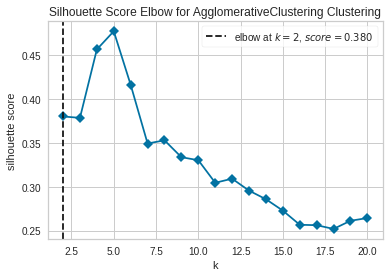

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
km = AgglomerativeClustering (n_clusters=5)
visualizer = KElbowVisualizer(
    km, k=(2,21),metric ='silhouette', timings=False
)

visualizer.fit(PCA_1) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data
#evaluatimg how “well clustered” data points are, using the silhouette score 

# K-means Clustering

In [ ]:
#Since we already preprocess and clean the data we can start with the scale data and be ready for the K-means clustering
df.head()

,Education,Marital_Status,Income,Spent_amount,Young_People,NumTotalPurchases,Total_Cmp,Age,Enrol_Date,Aggl_Cluster
0,0,1,58138.0,1617,0,25,1,65,997,3
1,0,1,46344.0,27,2,6,0,68,151,1
2,0,0,71613.0,776,0,21,0,57,498,0
3,0,0,26646.0,53,1,8,0,38,91,1
4,0,0,58293.0,422,1,19,0,41,347,0


In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaled_df = scaler.fit_transform(df)

In [ ]:
df_scaled = pd.DataFrame(Scaled_df,columns=df.columns)
df_scaled.head()

,Education,Marital_Status,Income,Spent_amount,Young_People,NumTotalPurchases,Total_Cmp,Age,Enrol_Date,Aggl_Cluster
0,-0.135804,1.298648,0.293254,1.676771,-1.213089,1.332926,0.645895,1.016495,2.047412,1.179868
1,-0.135804,1.298648,-0.276435,-0.980721,1.368947,-1.177159,-0.472606,1.270853,-1.693322,-0.237399
2,-0.135804,-0.770032,0.944141,0.271142,-1.213089,0.804487,-0.472606,0.338206,-0.159002,-0.946033
3,-0.135804,-0.770032,-1.227913,-0.937265,0.077929,-0.912939,-0.472606,-1.272730,-1.958622,-0.237399
4,-0.135804,-0.770032,0.300741,-0.320526,0.077929,0.540268,-0.472606,-1.018372,-0.826675,-0.946033


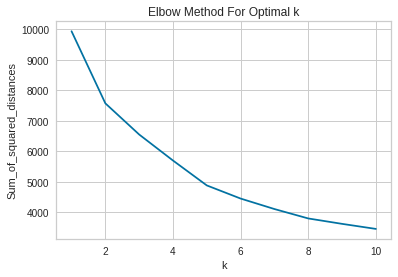

In [ ]:
#Elbow Method
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_scaled)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
#We can see 3-4 is looking nice for the be elbow but we need to look at Silhoutte Score better decision.

# K-means Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score 
for n_clusters in range(2,21):
    km = KMeans (n_clusters=n_clusters)
    preds = km.fit_predict(scaled_df)
    centers = km.cluster_centers_

    score = silhouette_score(Scaled_df, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
#We need maximum value of the scores and it is 3

For n_clusters = 2, silhouette score is 0.23466825857768123
For n_clusters = 3, silhouette score is 0.25248067154614573
For n_clusters = 4, silhouette score is 0.19583987289409666
For n_clusters = 5, silhouette score is 0.194797219818383
For n_clusters = 6, silhouette score is 0.18886309242774316
For n_clusters = 7, silhouette score is 0.20133954708498916
For n_clusters = 8, silhouette score is 0.18294691524831594
For n_clusters = 9, silhouette score is 0.18349558194678525
For n_clusters = 10, silhouette score is 0.18672141964521582
For n_clusters = 11, silhouette score is 0.17343687567064067
For n_clusters = 12, silhouette score is 0.18905186439809077
For n_clusters = 13, silhouette score is 0.16942244520043875
For n_clusters = 14, silhouette score is 0.17680152801968055
For n_clusters = 15, silhouette score is 0.17681758502005238
For n_clusters = 16, silhouette score is 0.17371391851762064
For n_clusters = 17, silhouette score is 0.17216167145561265
For n_clusters = 18, silhouette sc

In [ ]:
#From the above scores we can see that max is when n_clusters is 3 which  0,29

In [ ]:
#Modelling
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, random_state=42).fit(scaled_df)
predicted_kmeans=kmeans.predict(scaled_df)

In [ ]:
#We obtained the predicted values now for better see we are adding them to our dataframe and we are adding them to main df because after this model we weill not use it anymore
df['KMEANS_LABELS'] = predicted_kmeans + 1

In [ ]:
df.head()

,Education,Marital_Status,Income,Spent_amount,Young_People,NumTotalPurchases,Total_Cmp,Age,Enrol_Date,Aggl_Cluster,KMEANS_LABELS
0,0,1,58138.0,1617,0,25,1,65,997,3,2
1,0,1,46344.0,27,2,6,0,68,151,1,1
2,0,0,71613.0,776,0,21,0,57,498,0,2
3,0,0,26646.0,53,1,8,0,38,91,1,1
4,0,0,58293.0,422,1,19,0,41,347,0,1


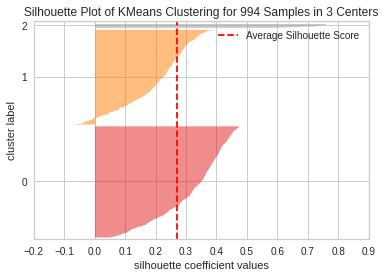

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
km = KMeans (n_clusters=3)
visualizer = SilhouetteVisualizer(km)

visualizer.fit(scaled_df) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data
#The Silhouette Visualizer displays the silhouette coefficient for each sample on a per-cluster basis, 
#visualizing which clusters are dense and which are not.
#This is particularly useful for determining cluster imbalance, or for selecting a value for K by comparing multiple visualizers.
#We have at grater than 0 and at the middle of 0-1 which means good dense clustering since near to 1

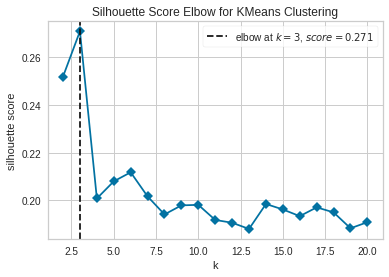

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
km = KMeans (n_clusters=3)
visualizer = KElbowVisualizer(
    km, k=(2,21),metric ='silhouette', timings=False
)

visualizer.fit(scaled_df) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data
#evaluatimg how “well clustered” data points are, using the silhouette score 
#We have the max score at k=3 wgich also obtained at elbow method we wrote

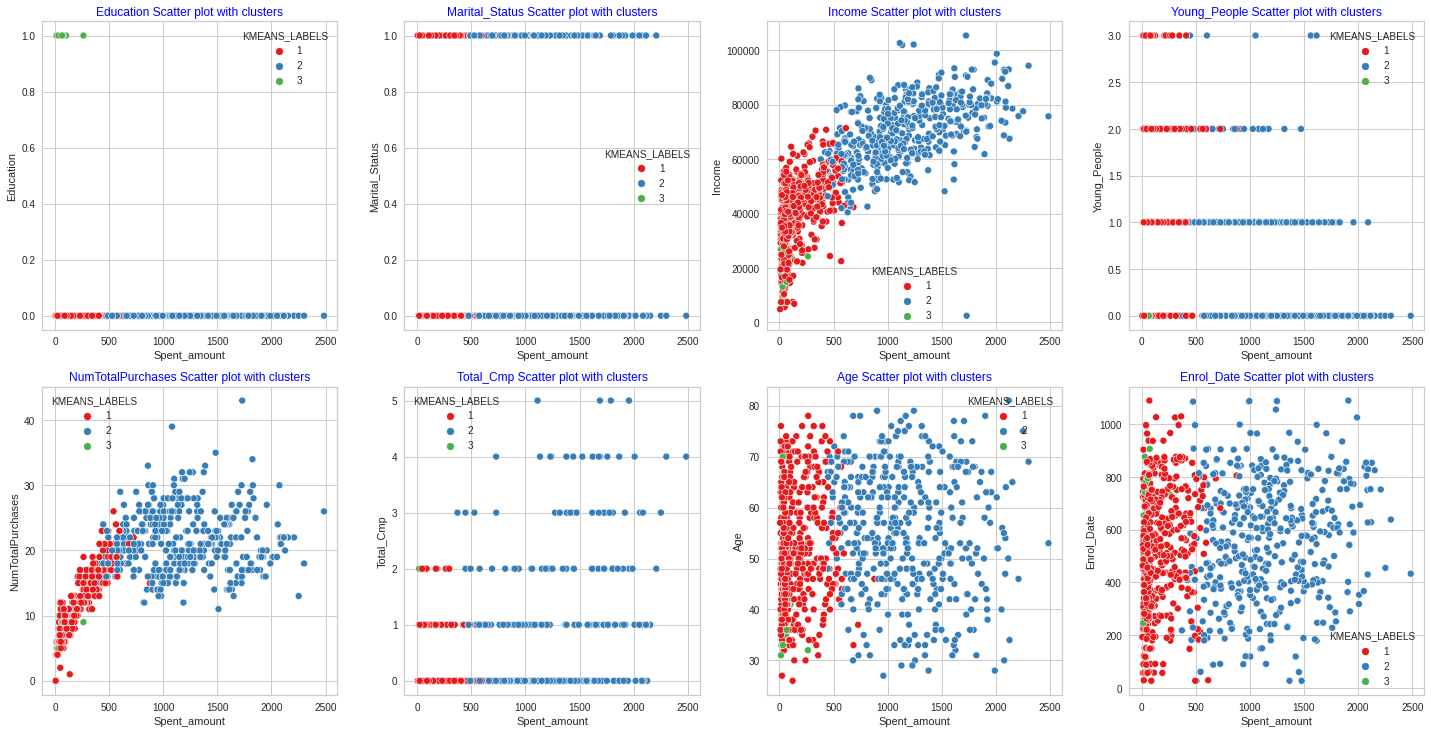

In [ ]:
f=plt.figure(figsize=(20,20))
scatter_cols =['Education', 'Marital_Status',
       'Income', 'Young_People', 'NumTotalPurchases',
       'Total_Cmp','Age','Enrol_Date']
for i, col in enumerate(scatter_cols):
    ax=f.add_subplot(4,4,i+1)
    sns.scatterplot(x=df['Spent_amount'],y=df[col],hue=df['KMEANS_LABELS'],palette='Set1')
    ax.set_title(col+" Scatter plot with clusters",color='blue')
    plt.ylabel(col)
f.tight_layout()

In [ ]:
#Education and Spent_amount scatter graph: 1 is undergraduate and 0 is postgraduates
#Group 3 is low spending who are undergraduate.Group 1 is low spending and Group 2 is averagea dn high spending.
####
#Marital Status and Spent_amount plot:(Single is 1 Partners is 0)
#Group 1 is şpw spending and both single and partnered. Group 2 is average and high spending.Group 3 is at low spending 
####
#Income and Spent amount:
#Group 3 is at low spending and low income.Group 1 is too low spending and low income.Group 2 is high spending and income
#####
#Young people and spend amount:
#Group 3 is too low spending and they have average young poeple. Group 2 is spending high when they have no youngs at home. Group 1 is spending too low at all levels.

In [ ]:
#Num total purchases and spent amount
#Group 1 is low at spending and low at total purchases.Group 2 is at average spending and average total purchases.Group 3 too low spending and low purchases
####
#Total_cmp and Spent amount:
#Group 2 is high at spending and all levels of accepted campaign. Group 1 is low at spending and low at total accept.Group 3 is lo at spending and total accepted camp too
####
#Age and spent_amount 
#Group 1 is too low at spending and all different ages they have. Group 2 is spending high and average and different ages.Group 3 is too low at spending.
####
#Enrollment Date and Spent amount:
#Group 1 is too low at spending and all different total dates they have. Group 2 is spending high and average and different dates total.Group 3 is too low at spending and enrol date.